# Is Citi Bike Used for Commuting?
## Authors: Sofiya Elyukin, Sebastian Bana, Ben Alpert
### Code taken from Assignment 2 of HW 3 (Jonathan Geis, Luis Fernando Melchor, and Scott Smith were collaborators), and Assignment 3 of HW 4. 

### Research Idea:
    People using CitiBike during "rush hours" (specific time to be defined based on MTAinfo: 
    http://web.mta.info/nyct/subway/howto_sub.htm) are commuters, and therefore there would more commuters using  CitiBike on
    weekdays than weekends.

### Null Hypothesis:
    The quantity of CitiBike rides during weekday rush hours as a ratio of total rides for that day will be equal to or
    significantly less than the same ratio on Saturday or Sunday. I will use a significance level of α = 0.05, which means I
    want the probability of getting a result at least as significant as mine to be less then 5%.

### Alternative Hypothesis:
    The amount of CitiBike rides during weekday rush hours as a ratio of total rides for that day will be greater than the
    same ratio on Saturday or Sunday.

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")
print (os.getenv('PUI2016'))
print (os.getenv('PUIDATA'))

Populating the interactive namespace from numpy and matplotlib
/home/cusp/se1296/PUI2016
/home/cusp/se1296/PUIdata


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201407'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
#Read the CSV into a data frame
df=pd.read_csv(os.getenv("PUIDATA")+'/' + datestring + '-citibike-tripdata.csv')

#Handle conversion of the string date into a new date collumn
df['date'] = pd.to_datetime(df['starttime'])
df['dateIndex'] = pd.to_datetime(df['starttime'])
df.head(4)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,dateIndex
0,404,2014-07-01 00:00:04,2014-07-01 00:06:48,545,E 23 St & 1 Ave,40.736502,-73.978095,402,Broadway & E 22 St,40.740343,-73.989551,19578,Subscriber,1987,2,2014-07-01 00:00:04,2014-07-01 00:00:04
1,850,2014-07-01 00:00:06,2014-07-01 00:14:16,238,Bank St & Washington St,40.736197,-74.008592,458,11 Ave & W 27 St,40.751396,-74.005226,19224,Subscriber,1987,1,2014-07-01 00:00:06,2014-07-01 00:00:06
2,1550,2014-07-01 00:00:21,2014-07-01 00:26:11,223,W 13 St & 7 Ave,40.737815,-73.999947,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,17627,Subscriber,1973,2,2014-07-01 00:00:21,2014-07-01 00:00:21
3,397,2014-07-01 00:00:29,2014-07-01 00:07:06,224,Spruce St & Nassau St,40.711464,-74.005524,2008,Little West St & 1 Pl,40.705693,-74.016777,15304,Subscriber,1982,1,2014-07-01 00:00:29,2014-07-01 00:00:29


In [5]:
rides = df[['dateIndex', 'date']]
rides.set_index('dateIndex', inplace = True)
rides.head()

,date
dateIndex,
2014-07-01 00:00:04,2014-07-01 00:00:04
2014-07-01 00:00:06,2014-07-01 00:00:06
2014-07-01 00:00:21,2014-07-01 00:00:21
2014-07-01 00:00:29,2014-07-01 00:00:29
2014-07-01 00:00:37,2014-07-01 00:00:37


In [6]:
rides_rushMorning = rides.between_time("6:30","9:30")
rides_rushEvening = rides.between_time("15:30","20:00")
rides_rush = pd.concat(([rides_rushMorning,rides_rushEvening]))
rides_rush.head()

,date
dateIndex,
2014-07-01 06:30:04,2014-07-01 06:30:04
2014-07-01 06:30:05,2014-07-01 06:30:05
2014-07-01 06:30:06,2014-07-01 06:30:06
2014-07-01 06:30:09,2014-07-01 06:30:09
2014-07-01 06:30:10,2014-07-01 06:30:10


In [7]:
rides_nonRushDay = rides.between_time("9:30","15:30")
rides_nonRushNight = rides.between_time("20:00","6:30")
rides_nonRush = pd.concat(([rides_nonRushDay,rides_nonRushNight]))
rides_nonRush.head()

,date
dateIndex,
2014-07-01 09:30:01,2014-07-01 09:30:01
2014-07-01 09:30:04,2014-07-01 09:30:04
2014-07-01 09:30:05,2014-07-01 09:30:05
2014-07-01 09:30:09,2014-07-01 09:30:09
2014-07-01 09:30:09,2014-07-01 09:30:09


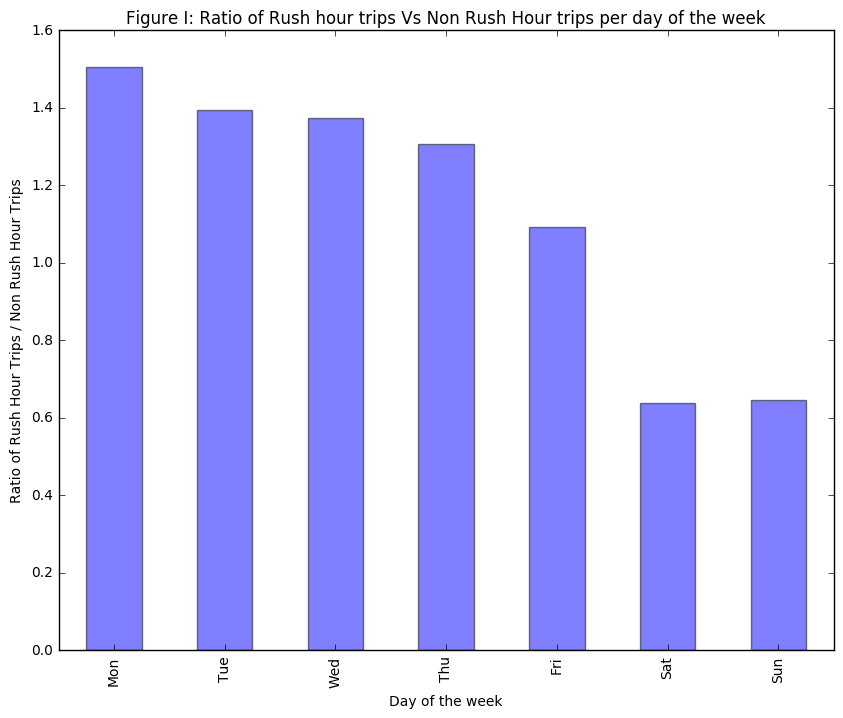

In [8]:
fig=pl.figure(figsize(10,8))

rides_countRushDay = rides_rush.date.groupby([rides_rush.date.dt.weekday]).count()
rides_countNonRushDay = rides_nonRush.date.groupby([rides_nonRush.date.dt.weekday]).count()

ax = ((rides_countRushDay/rides_countNonRushDay)).plot(kind="bar", alpha=0.5)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
ax.set_ylabel ("Ratio of Rush Hour Trips / Non Rush Hour Trips")
ax.set_xlabel ("Day of the week")
ax.set_title ('Figure I: Ratio of Rush hour trips Vs Non Rush Hour trips per day of the week', fontsize = 12)

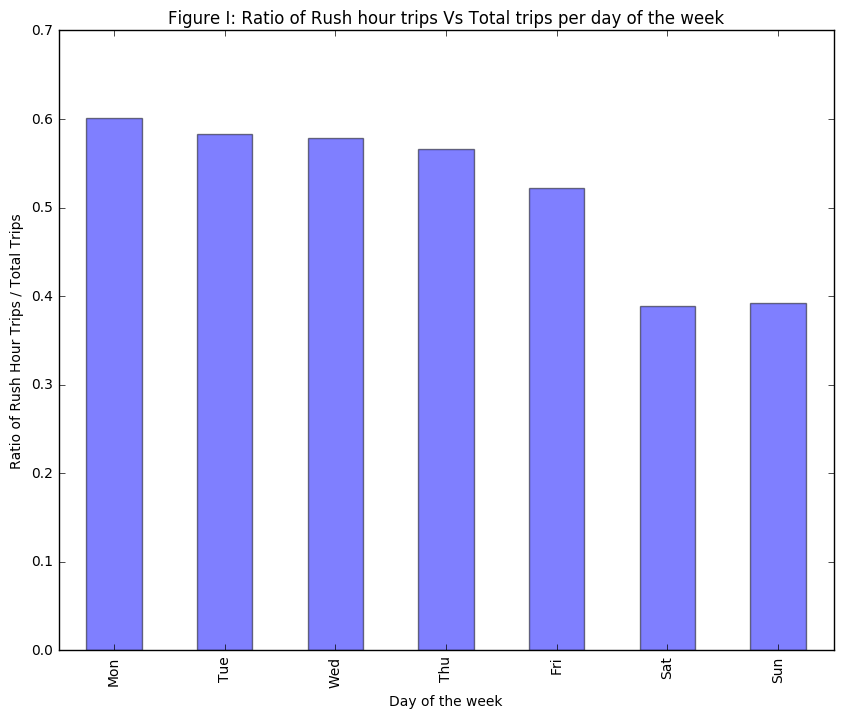

In [9]:
ax = ((rides_countRushDay/(rides_countNonRushDay+rides_countRushDay)).plot(kind="bar", alpha=0.5))
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
ax.set_ylabel ("Ratio of Rush Hour Trips / Total Trips")
ax.set_xlabel ("Day of the week")
ax.set_title ('Figure I: Ratio of Rush hour trips Vs Total trips per day of the week', fontsize = 12)

In [10]:
print ("The average ratio rush hour trips / non rush hour trips during the week is: "
       + str(((rides_countRushDay/rides_countNonRushDay)[:5]).mean()))

print ("The average ratio rush hour trips / non rush hour trips during the weekends is: "
       + str(((rides_countRushDay/rides_countNonRushDay)[5:]).mean()))

print ("The average ratio rush hour trips / total trips during the week is: "
       + str(((rides_countRushDay/(rides_countNonRushDay+rides_countRushDay))[:5]).mean()))

print ("The average ratio rush hour trips / total trips during the weekends is: "
       + str(((rides_countRushDay/(rides_countNonRushDay+rides_countRushDay))[5:]).mean()))

The average ratio rush hour trips / non rush hour trips during the week is: 1.33500848861
The average ratio rush hour trips / non rush hour trips during the weekends is: 0.641333778226
The average ratio rush hour trips / total trips during the week is: 0.570200482069
The average ratio rush hour trips / total trips during the weekends is: 0.390735586945


## Calculating the Z-Score

In [11]:
alpha = 0.05

n0 = (rides_countRushDay+rides_countNonRushDay)[:5].sum() # calculating total weekday rides
n1 = ((rides_countRushDay+rides_countNonRushDay)[5:].sum()) # calculating total weekend rides

rushRiders_week = (rides_countRushDay)[:5].sum()
rushRiders_weekend = (rides_countRushDay)[5:].sum()

p0 = rushRiders_week / n0
p1 = rushRiders_weekend / n1

Nt0 = p0 * n0
Nt1 = p1 * n1

In [12]:
sp = (Nt0 + Nt1) / (n1 + n0)
print ('The Sample Proportion is: ', sp)

pHat = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
stdErr = lambda pHat, n0, n1: np.sqrt(pHat * (1 - pHat) * (1.0 / n0 + 1.0 / n1))

zscore = lambda p0, p1, s : (p0 - p1) / s
zRush = zscore(p0, p1, stdErr(pHat(p0, p1, n0, n1), n0, n1))

print ('The Z-score is: ', zRush)

The Sample Proportion is:  0.531476477789
The Z-score is:  147.876488179


## Do we accept or reject the null?

In [14]:
# The p-value is determined by finding the P for the given z-score in a z-score table, and subtracting that value from 1.
pValRush = 1 - 0.9998

def report_result(p,a):
    print ('Is the p-value ' + '{0:.4f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('The Null hypothesis is {}.'.format('rejected' if p < a  else 'not rejected') )

report_result(pValRush, alpha)

Is the p-value 0.0002 smaller than the critical value 0.05?
YES!
The Null hypothesis is rejected.
